# Проверка гипотез для увеличения выручки
Вместе с отделом маркетинга крупного интернет-магазина был подготовлен список гипотез для увеличения выручки. Нам необходимо приоритизировать гипотезы, провести A/B-тест и проанализировать результаты.

Этапы исследования:

**1. Откроем файлы с данными, изучим общую информацию и подготовим данные**

Файлы:

- hypothesis.csv
- orders.csv
- visitors.csv

**2. Проведем приоритизацию гипотез**

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

**3. Анализ A/B-теста**

Мы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv. Проанализируем A/B-тест:

1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения;
2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения;
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения;
4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения;
5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения;
6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения;
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей;
8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения;
9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов;
10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения;
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения;
12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения;
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения;
14. Примем решение по результатам теста и объясним его. Варианты решений:

   - Остановить тест, зафиксировать победу одной из групп.

   - Остановить тест, зафиксировать отсутствие различий между группами.

   - Продолжить тест.

**4. Общий вывод**

# Описание данных

**Файл hypothesis.csv (гипотезы по увеличению выручки интернет-магазина):**

- Hypothesis — краткое описание гипотезы
- Reach — охват пользователей по 10-балльной шкале
- Impact — влияние на пользователей по 10-балльной шкале
- Confidence — уверенность в гипотезе по 10-балльной шкале
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

**Файл orders.csv (результаты A/B-теста):**

- transactionId — идентификатор заказа
- visitorId — идентификатор пользователя, совершившего заказ
- date — дата, когда был совершён заказ
- revenue — выручка заказа
- group — группа A/B-теста, в которую попал заказ

**Файл visitors.csv (результаты A/B-теста):**

- date — дата
- group — группа A/B-теста
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Откроем файлы с данными, изучим общую информацию и подготовим данные

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
# читаем файлы 
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

visitors = pd.read_csv('https://code.s3.yandex.net/datasets//visitors.csv')  

In [3]:
# напишем функцию для обзора данных
def df_review(df):
    display(df.head())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.info())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.isna().sum())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.duplicated().sum())

In [4]:
# посмотрим на данные hypothesis
df_review(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
---------------------------------------------------------------------------------------------------------
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
---------------------------------------------------------------------------------------------------------
0


In [5]:
# посмотрим на данные orders
df_review(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
---------------------------------------------------------------------------------------------------------
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
---------------------------------------------------------------------------------------------------------
0


In [6]:
# посмотрим на данные visitors
df_review(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
---------------------------------------------------------------------------------------------------------
date        0
group       0
visitors    0
dtype: int64
---------------------------------------------------------------------------------------------------------
0


<font color='green'>**Вывод:**</font>

Нужно привести названия столбцов к нижнем регистру, необходимо поменять тип данных в столбцах data. Пропусков не обнаружено. Дубликаты отсутствуют.

#### Предобработка данных

In [7]:
# приведем названия столбцов к нижнему регистру и змеиному стилю
all_data = [hypothesis, orders, visitors]

for data in all_data:
    data.columns = [x.lower().replace(' ', '_') for x in data.columns.values]

In [8]:
# проверим изменения
display(hypothesis.sample(5))
display(orders.sample(5))
display(visitors.sample(5))

,hypothesis,reach,impact,confidence,efforts
7,Добавить форму подписки на все основные страни...,10,7,8,5
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3


,transactionid,visitorid,date,revenue,group
54,4159234359,3660046170,2019-08-16,100,A
513,3944922068,1474473704,2019-08-06,6930,B
694,3165578945,1253818784,2019-08-09,9290,B
148,4238948438,363280180,2019-08-01,300,B
879,1197739160,1801183820,2019-08-05,390,A


,date,group,visitors
41,2019-08-11,B,721
52,2019-08-22,B,650
13,2019-08-14,A,735
18,2019-08-19,A,502
11,2019-08-12,A,595


In [9]:
# преобразуем название столбцов
orders = orders.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'}) 

In [10]:
# посмотрим изменения
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
# приведем данные нужных столбцов к типу datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [12]:
# посмотрим изменения
print(orders['date'].dtype)
print(visitors['date'].dtype)

datetime64[ns]
datetime64[ns]


<font color='green'>**Вывод:**</font>

На первом этапе мы сохранили данные о визитах, заказах и гипотизах в переменные и подготовили их к анализу. Проверили на отсутствие пропусков, привели столбцы к нижнему регистру и змеиному стилю. Также было проверено, что отсутствуют явные дубликаты, а также что тип данных во всех колонках соответствует значениям.

### Приоритизация гипотез

- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
- Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

Фреймворки ICE И RICE расчитываются по следующим формулам:


$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [13]:
# сделаем чтобы текст в таблице отображался полностью
pd.set_option('display.max_colwidth', None)

In [14]:
# создаем новый столбец ice и cортируем по убыванию приоритета
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


<font color='green'>**Вывод:**</font> 

Приоритетные гипотезы по ICE:

- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.


In [15]:
# создаем новый столбец rice и сортируем по убыванию приоритета
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<font color='green'>**Вывод:**</font> 

Приоритетные гипотезы по RICE:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

<font color='green'>**Вывод:**</font>  

Наболее перспективная гипотеза по ICE под номером 8 оказалась на пятом месте при расчете RICE. Это объясняется показателем reach - количество пользователей, которое затронет изменение(в 8 гипотезе затронет всего 1-го пользователя). Этот показатель также оказал влияние и на другие гипотезы. Учитывая результаты обеих приоритизаций гипотез наиболее важными из них являются:

- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

### Анализ A/B-теста

1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения;
2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения;
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения;
4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения;
5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения;
6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения;
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей;
8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения;
9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов;
10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения;
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения;
12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения;
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения;
14. Примем решение по результатам теста и объясним его. Варианты решений:

   - Остановить тест, зафиксировать победу одной из групп.

   - Остановить тест, зафиксировать отсутствие различий между группами.

   - Продолжить тест.

In [16]:
# посмотрим пересечение пользователей между группами
# отбираем группы  
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# получаем пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
print('Количество пользователей, попавших в обе группы = ', len(group_intersections))
print('Доля пользователей, попавших в обе группы = ', round(len(group_intersections)/orders.shape[0],2))

Количество пользователей, попавших в обе группы =  58
Доля пользователей, попавших в обе группы =  0.05


In [17]:
# посмотрим количество пользователей в каждой группе
print('Количество пользователей в группе A = ', len(orders.query('group == "A"')))
print('Количество пользователей в группе B = ', len(orders.query('group == "B"')))

Количество пользователей в группе A =  557
Количество пользователей в группе B =  640


#### Построим график кумулятивной выручки по группам

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


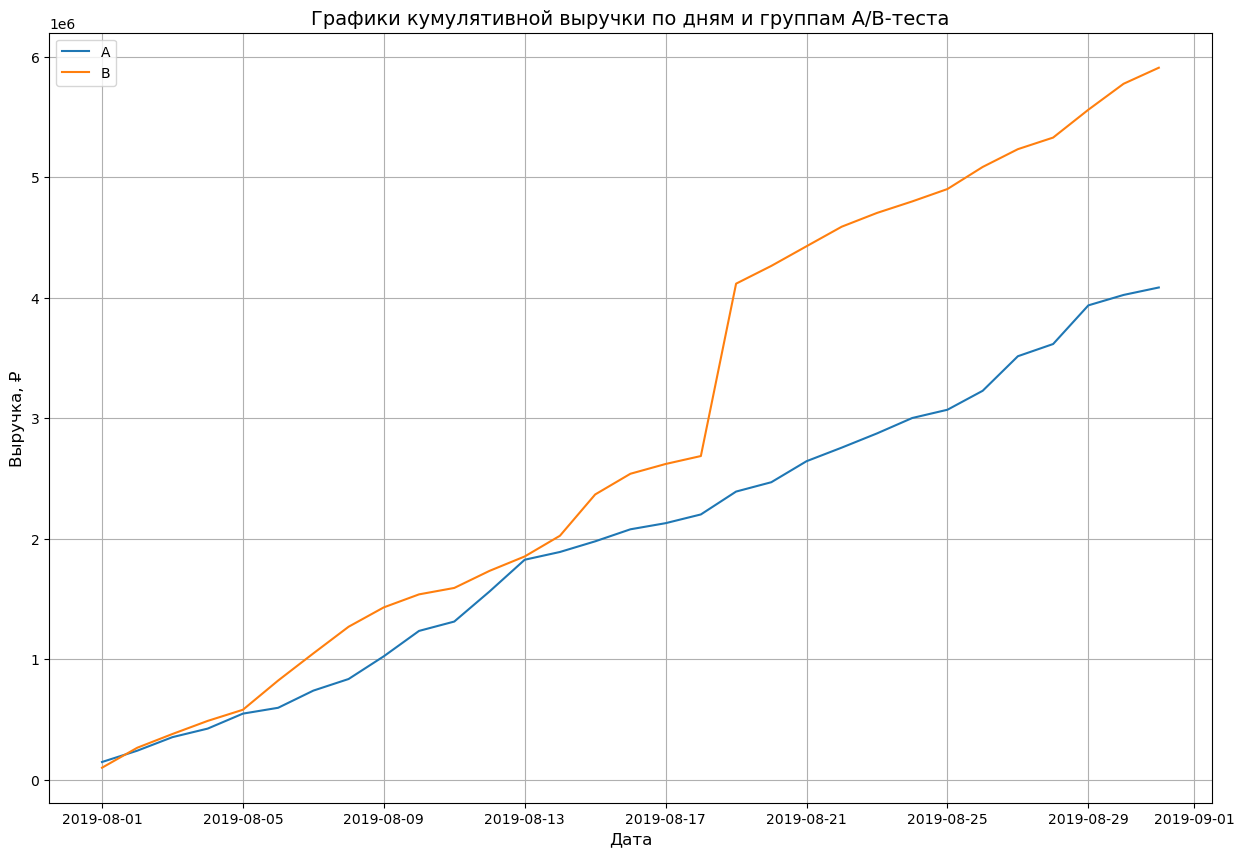

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

# задаём размер для графиков
plt.figure(figsize=(15, 10))

# строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивной выручки по дням и группам A/B-теста', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка, ₽', fontsize=12)
plt.legend() 
plt.show()

<font color='green'>**Вывод:**</font>  

Выручка почти равномерно увеличивается в течение всего теста. Однако графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#### Построим график кумулятивного среднего чека по группам

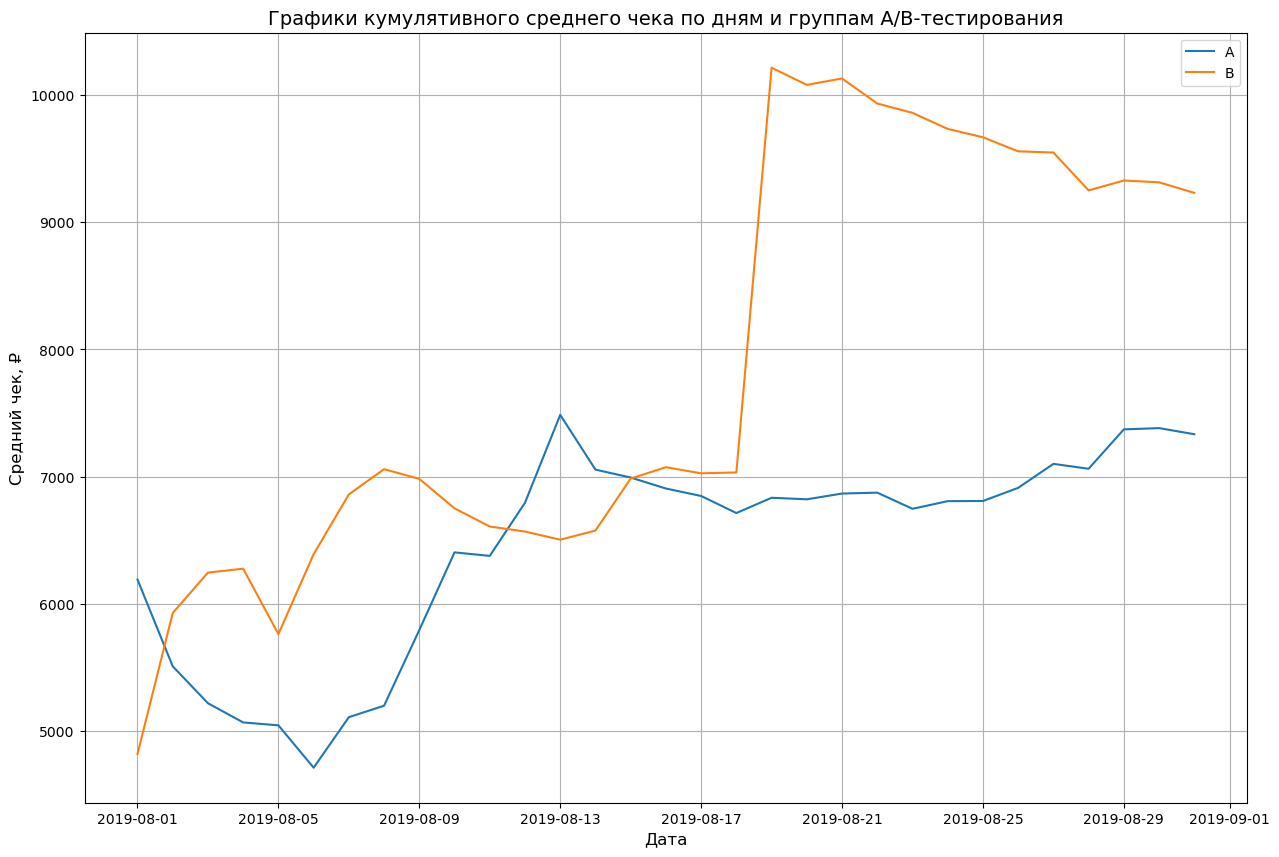

In [20]:
# построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15, 10))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-тестирования', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек, ₽', fontsize=12)
plt.legend() 
plt.show()

<font color='green'>**Вывод:**</font>

- Группа А - средний чек после падения в начале и резкого скачка после, стабилизировался в значениях с тенденцией к росту.
- Группа В - средний чек в группе B в одной точке резко вырос, как и выручка. Далее видна тенденция к снижению среднего чека в этой группе. Величины среднего чека в группе В выше, чем в группе А.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

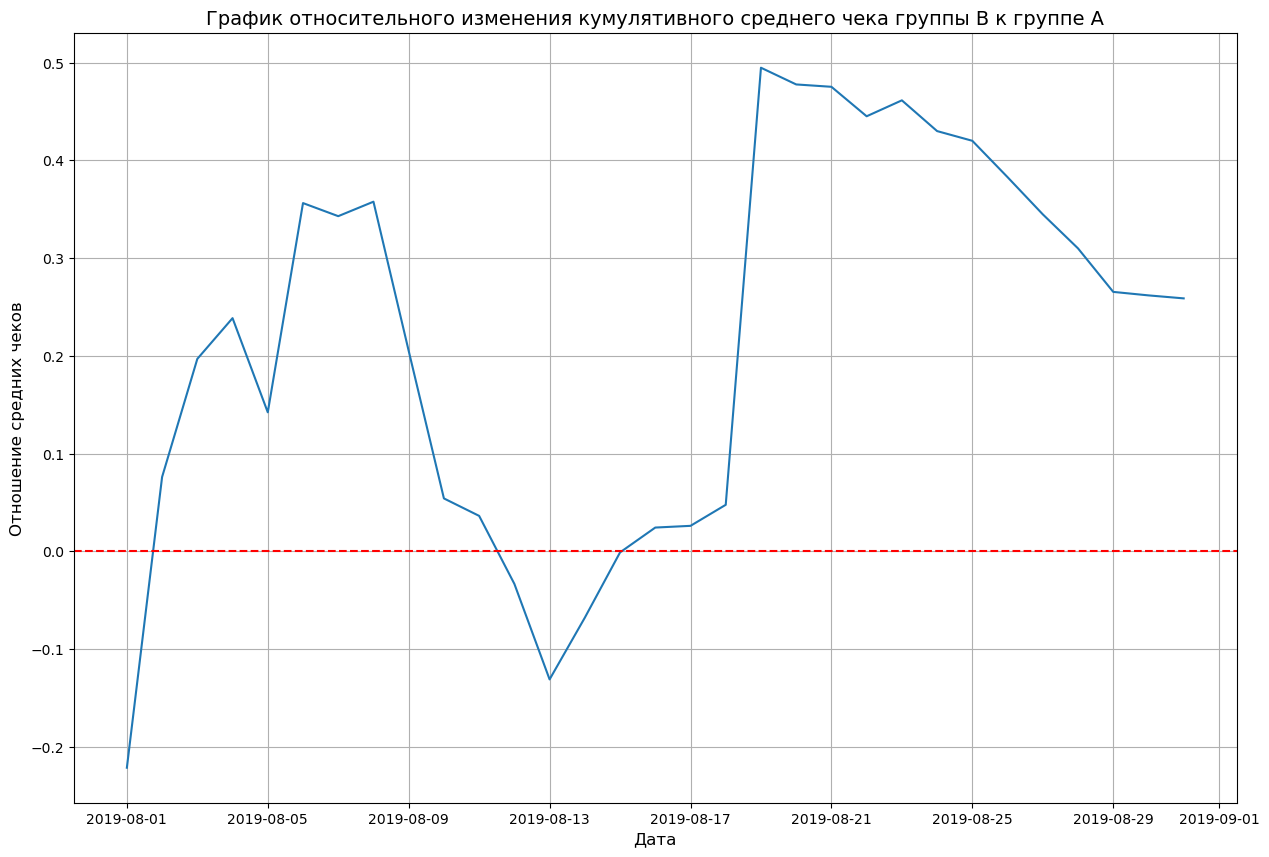

In [21]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(15, 10))

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/
          merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/
          merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12)
plt.show()

<font color='green'>**Вывод:**</font>

В нескольких точках график различия между сегментами резко «скачет», это говорит о наличии крупных заказов и выбросов!

#### Построим график кумулятивного среднего количества заказов на посетителя по группам

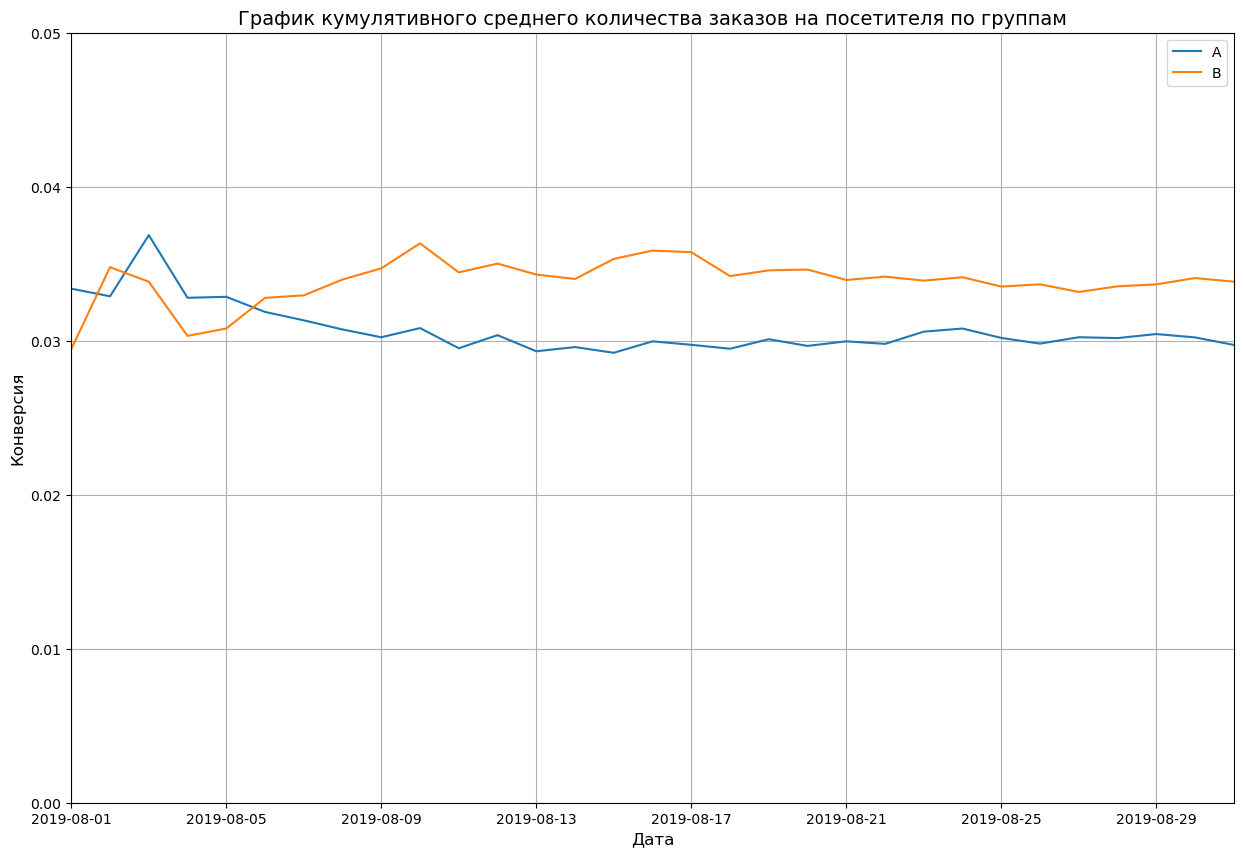

In [22]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulativeData[cumulativeData['group']=='B']

# задаём размер для графиков
plt.figure(figsize=(15, 10))

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]) 

plt.grid(visible=True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.legend()
plt.show()

<font color='green'>**Вывод:**</font>

Группы колеблятся около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

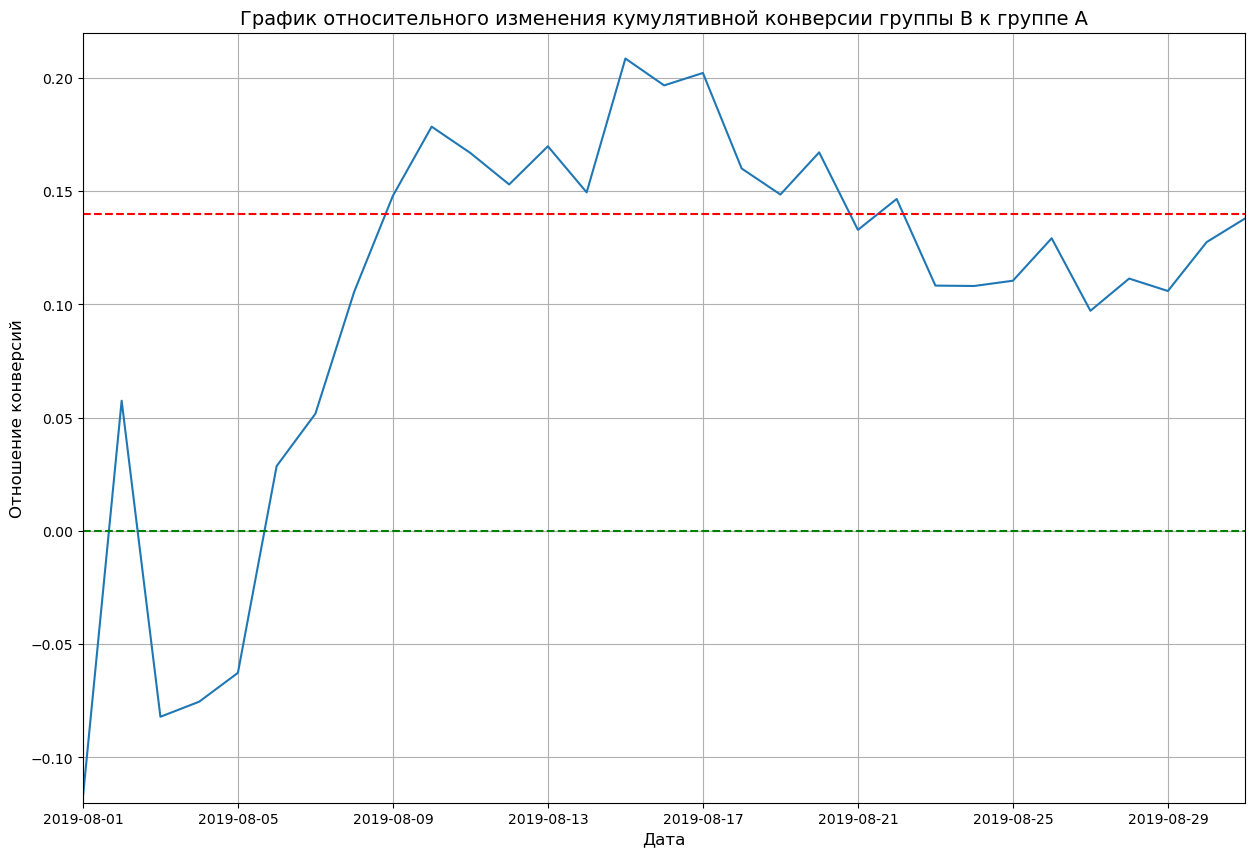

In [23]:
# соединяем
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(15, 10))

# cтроим отношение конверсий
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversionB']/
         merged_cumulative_conversions['conversionA']-1)

# добавляем оси X
plt.axhline(y=0, color='green', linestyle='--')
plt.axhline(y=0.14, color='red', linestyle='--')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.12, 0.22])

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение конверсий', fontsize=12)
plt.show()

<font color='green'>**Вывод:**</font>

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и стабилизруется.
Сейчас делать какие-либо выводы по тесту нельзя, сперва стоит проанализировать аномалии, возможно, они изменят картину.

#### Построим точечный график количества заказов по пользователям

In [24]:
# посмотреть число заказов по пользователям
orders_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .sort_values(by='transaction_id', ascending=False)
    .rename(columns={'transaction_id': 'orders'})
)

display(orders_users.head(10))

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


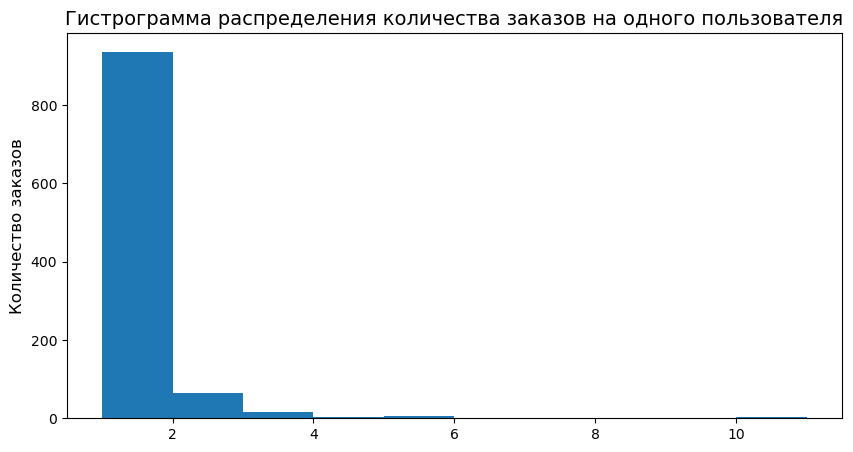

In [25]:
# построим гистограмму распределения заказов на одного пользователя
plt.figure(figsize=(10, 5))
plt.hist(orders_users['orders']) 
plt.title('Гистрограмма распределения количества заказов на одного пользователя', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)
plt.show()

<font color='green'>**Вывод:**</font>

Можем заметить присутствие нескольких пользователей с большим количеством заказов. В основном пользователи делают один заказ, но так же присутствуют те, кто сделали 10 заказов.

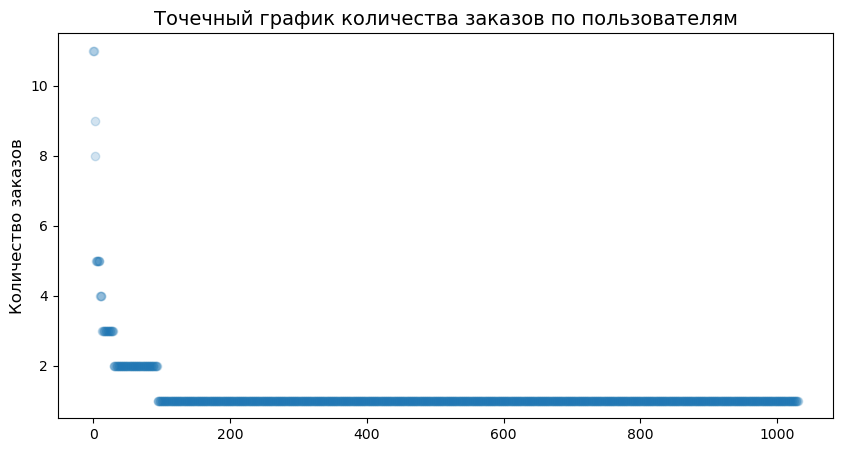

In [26]:
# построим точечный график кол-ва заказов по пользователям 
x_values = pd.Series(range(0,len(orders_users)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_users['orders'], alpha=0.2)
plt.title('Точечный график количества заказов по пользователям', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)
plt.show()

<font color='green'>**Вывод:**</font>

Мы видим, что есть пользователей которые сделал от 2-5 заказов. Непонятно, брать такие заказы за аномалии или нет. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [27]:
# применим метод percentile() библиотеки Numpy для подсчёта перцентилей
print(np.percentile(orders_users['orders'], [95, 99]))

[2. 4.]


<font color='green'>**Вывод:**</font>

Не более 1% пользователей совершали больше 4-х заказов и не больше 5% пользоваетелей совершали больше 2-х заказов. Выберем 4 заказа на пользователя как нижнюю границу, остальные будем считать аномалиями.

#### Построим точечный график стоимостей заказов

In [28]:
# посмотрим на топ-5 самых дорогих заказов
display(orders.sort_values(by='revenue', ascending=False).head())

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


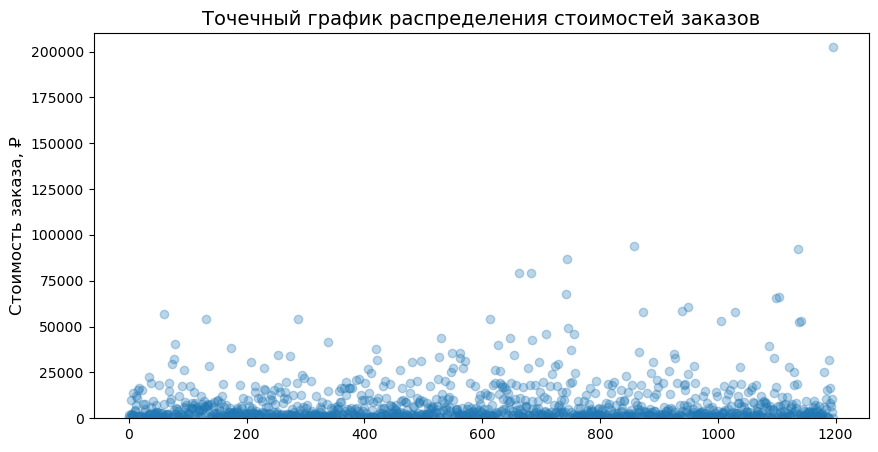

In [29]:
# строим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.title('Точечный график распределения стоимостей заказов', fontsize=14)
plt.ylabel('Стоимость заказа, ₽', fontsize=12)
plt.ylim(0, 210000)
plt.show()

<font color='green'>**Вывод:**</font>

Мы видим, что присутствуют некоторое количество дорогих заказов. Нужно посчитать перцентили чтобы понять какие заказы счить за аномалии.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [30]:
# применим метод percentile() библиотеки Numpy для подсчёта перцентилей
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


<font color='green'>**Вывод:**</font>

5% заказов имеют стоимость 28000 руб и более, а 1% заказов имеют стоимость 58233 руб и более. Можем выбрать нижнию границу стоимости заказов в 28000 руб , а остальные заказы посчитать за аномальные.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Сформулируем гипотезы:**

- H₀ - различий в среднем количестве заказов на посетителя между группами нет;
- H₁ - различия в среднем количестве заказов на посетителя между группами есть.

**Сформируем новые столбцы с данными:**

- date - дата;
- orders_per_date_a - количество заказов в выбранную дату в группе A;
- revenue_per_date_a - суммарная выручка в выбранную дату в группе A;
- orders_per_date_b - количество заказов в выбранную дату в группе B;
- revenue_per_date_b - суммарная выручка в выбранную дату в группе B;
- orders_cummulative_a - суммарное число заказов до выбранной даты включительно в группе A;
- revenue_cummulative_a - суммарная выручка до выбранной даты включительно в группе A;
- orders_cummulative_b - суммарное число заказов до выбранной даты включительно в группе B;
- revenue_cummulative_b - суммарная выручка до выбранной даты включительно в группе B;
- visitors_per_date_a - количество пользователей в выбранную дату в группе A;
- visitors_cummulative_a - количество пользователей до выбранной даты включительно в группе A;
- visitors_per_date_b - количество пользователей в выбранную дату в группе B;
- visitors_cummulative_b - количество пользователей до выбранной даты включительно в группе B.

In [31]:
# расчет количества пользователей в выбранную дату в группе А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# расчет количества пользователей до выбранной даты включительно в группе А
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# расчет количества пользователей в выбранную дату в группе В
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# расчет количества пользователей до выбранной даты включительно в группе В
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# расчет количества заказов и суммарной выручки в выбранную дату в группе A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# расчет суммарного числа заказов до выбранной даты включительно в группе A
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

# расчет количества заказов и суммарной выручки в выбранную дату в группе В
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# расчет суммарного числа заказов до выбранной даты включительно в группе В
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

# объединение датафреймов в один общий
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


- Создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
- Объявим переменные sample_a и sample_b, в которых пользователям с заказами будет соответствовать число заказов пользователя, а тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
- Посчитаем статистическую значимость различия конверсии по результатам месяца теста.
- Выведем p-value для сравнения конверсии между группами.
- Вычислим относительное различие в конверсии между группами.

In [32]:
# формирование датафреймов в которых указано число совершённых заказов
# для пользователей, которые заказывали хотя бы 1 раз
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

# формирование переменных в которых пользователям с заказами
# будет соответствовать число заказов пользователя,
# а пользователям без заказов — нули
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_a'].sum() -
                          len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_b'].sum() -
                          len(orders_by_users_b['orders'])), name='orders')], axis=0)

# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «сырым» данным:',
      '{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

p-value = 0.017
Относительное различие в средней конверсии между группами по «сырым» данным: 0.138


<font color='green'>**Вывод:**</font>

Нулевую гипотезу об отсутствии различий по «сырым» данным в конверсии между группами можно отвергнуть, так как p-value = 0.017, что меньше 0.05. Средняя конверсия группы В больше средней конверсии группы А.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

**Сформулируем гипотезы:**

- H₀ - различий в среднем чеке между группами нет;
- H₁ - различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов и найдём относительные различия в среднем чеке между группами.

In [33]:
# рассчет статистической значимости различия среднего чека по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])[1]))

# рассчет относительного различия в среднем чеке между группами
print('Относительное различие в среднем чеке между группами по «сырым» данным:',
      '{0:.3f}'.format(
          orders[orders['group']=='B']['revenue'].mean()/
          orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Относительное различие в среднем чеке между группами по «сырым» данным: 0.259


<font color='green'>**Вывод:**</font>

Относительное различие в среднем чеке между группами по «сырым» данным, нет, p-value = 0.729, что больше 0.05, нулевую гипотезу не можем отвергнуть. Средний чек группы В сильно больше среднего чека группы А.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Возьмем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей и запишем это в переменных many_orders и expensive_orders. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — users_with_many_orders и пользователей, совершивших заказы дороже 28 000 — users_with_expensive_orders. Объединим их в таблице abnormal_users. А также узнаем, сколько всего аномальных пользователей методом shape().

In [34]:
many_orders = np.percentile(orders_users['orders'], 95)
expensive_orders = np.percentile(orders['revenue'], 95)
users_with_many_orders = pd.concat([
    orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
    orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id']], axis=0)
users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']
abnormal_users = (pd.concat([
    users_with_many_orders,
    users_with_expensive_orders], axis=0)
                  .drop_duplicates()
                  .sort_values())

print(abnormal_users.head())
print('\n')
print('Количество аномальных пользователей:', abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64


Количество аномальных пользователей: 74


<font color='green'>**Вывод:**</font>

Количество аномальных пользователей - 74. Нужно понять, как они повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Подготовим выборки количества заказов по пользователям по группам теста и применим статистический критерий Манна-Уитни к полученным выборкам.

**Сформулируем гипотезы:**

- H₀ - различий в конверсии между группами нет;
- H₁ - различия в конверсии между группами есть.

In [35]:
sample_a_filtered = pd.concat([
    orders_by_users_a[np.logical_not(
        orders_by_users_a['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() -
                                 len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b_filtered = pd.concat([
    orders_by_users_b[np.logical_not(
        orders_by_users_b['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -
                                 len(orders_by_users_b['orders'])), name='orders')], axis=0)

# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «очищенным» данным:',
      '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value = 0.013
Относительное различие в средней конверсии между группами по «очищенным» данным: 0.173


<font color='green'>**Вывод:**</font>

Нулевую гипотезу об отсутствии различий по «очищенным» данным в конверсии между группами можно отвергнуть, так как p-value = 0.013, что меньше 0.05 По «сырым» данным p-value был равен 0.017. Средняя конверсия группы В больше средней конверсии группы А. Относительное различие в конверсии между группами по «сырым» данным было равно 0.138. Результаты по «очищенным» данным незначительно отличаются от результатов по «сырым» данным.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Сформулируем гипотезы:**

- H₀ - различий в среднем чеке между группами нет;
- H₁ - различия в среднем чеке между группами есть.

In [36]:
print('p-value =',
      '{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'], 
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'])[1]))

print('Относительное различие в среднем чеке между группами по «очищенным» данным:',
      '{0:.3f}'.format(
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() /
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() - 1))

p-value = 0.738
Относительное различие в среднем чеке между группами по «очищенным» данным: -0.020


<font color='green'>**Вывод:**</font>

Относительное различие в среднем чеке между группами по «очищенным» данным, нет, p-value = 0.738, что значительно больше 0.05,
отвергнуть нулевую гипотезу не можем. По «сырым» данным p-value был равен 0.729. Однако по «очищенным» данным средний чек группы А больше среднего чека группы В. По «сырым» данным было наоборот, относительное различие в среднем чеке между группами составляло 0.259.

In [37]:
#CODE REVIEW
# вот так будет очищенная таблица
orders_2 = orders.loc[~orders['visitor_id'].isin(set(abnormal_users))]
orders_2

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


<hr style="border: 2px solid orange;" />

In [38]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups_2 = orders_2[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated_2 = datesGroups_2.apply(
    lambda x: orders_2[
        np.logical_and(
            orders_2['date'] <= x['date'], orders_2['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях 
visitorsAggregated_2 = datesGroups_2.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице
cumulativeData_2 = ordersAggregated_2.merge(
    visitorsAggregated_2, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData_2.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


In [39]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a_2 = cumulativeData_2[cumulativeData_2['group']=='A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b_2 = cumulativeData_2[cumulativeData_2['group']=='B'][['date', 'revenue', 'orders']]


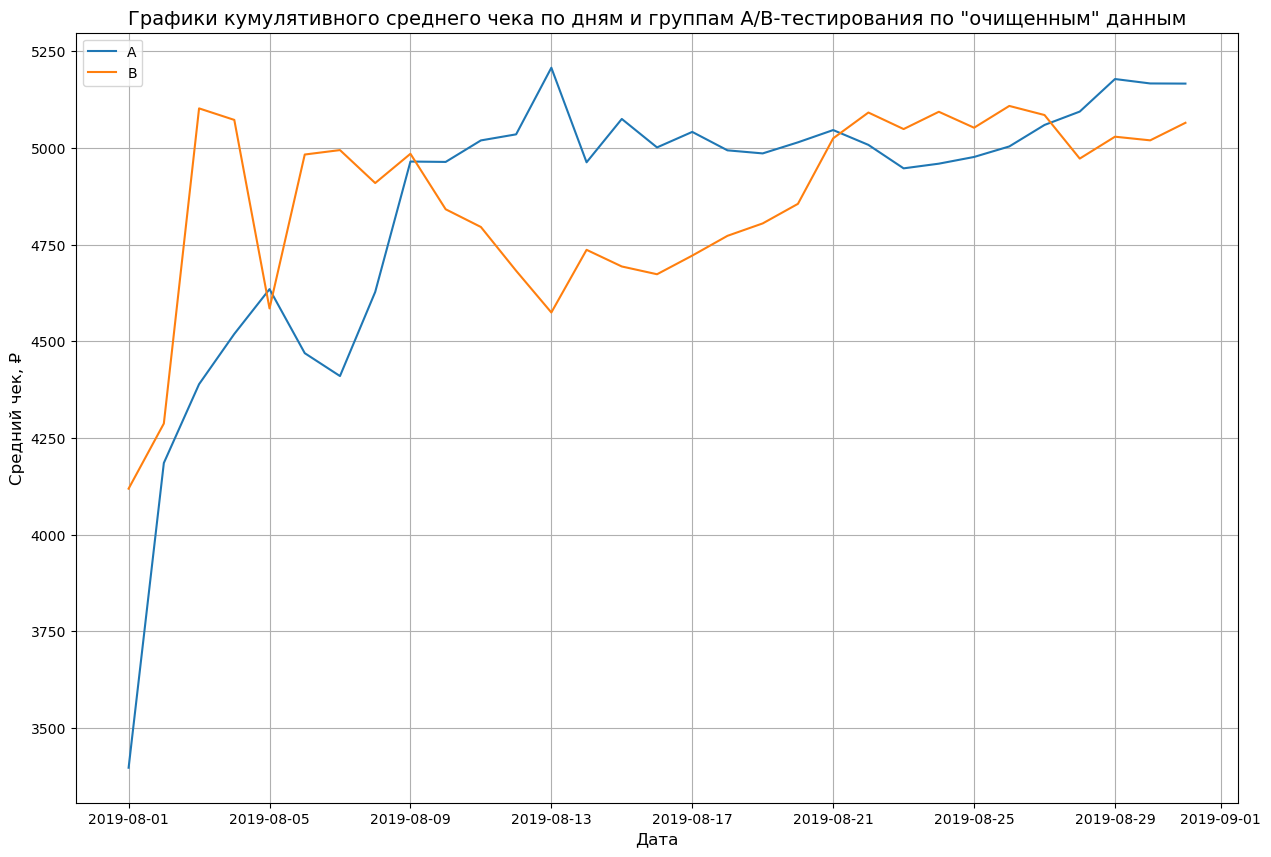

In [40]:
# строим график кумулятивного среднего чека по дням и группам A/B-тестирования по 'очищенным' данным
plt.figure(figsize=(15, 10))
plt.plot(cumulative_revenue_a_2['date'], cumulative_revenue_a_2['revenue']/cumulative_revenue_a_2['orders'], label='A')
plt.plot(cumulative_revenue_b_2['date'], cumulative_revenue_b_2['revenue']/cumulative_revenue_b_2['orders'], label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-тестирования по "очищенным" данным', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек, ₽', fontsize=12)
plt.legend() 
plt.show()

<font color='green'>**Вывод:**</font>

Мы видим, что после роста и падений в начале теста группа А стабилизировалась и превышает значения группы В. Группа В имеет меньшее значение среднего чека в отличие от 'сырых' данных, но наблюдается тенденция к росту.

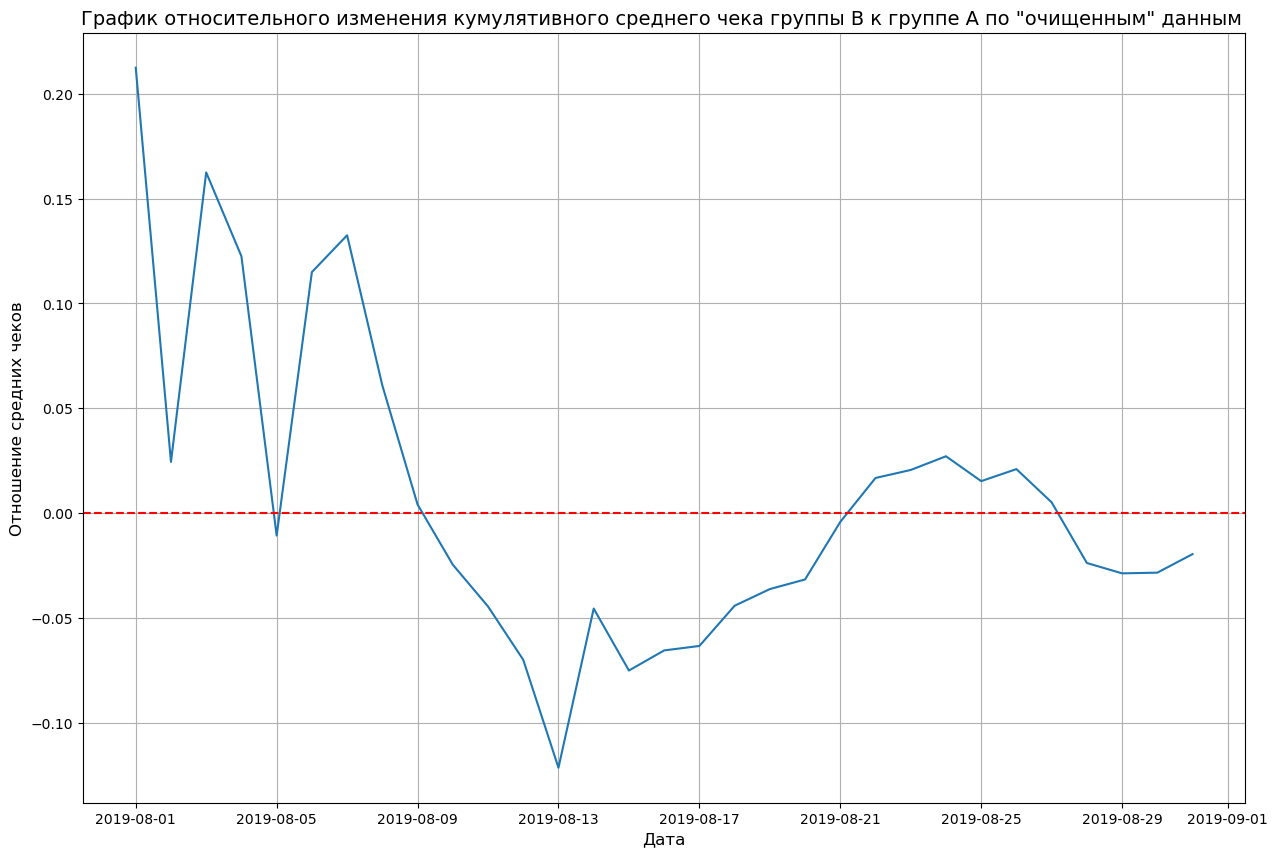

In [41]:
# строим график относительного изменения кумулятивного среднего чека группы B к группе A по "очищенным" данным
# собираем данные в одном датафрейме
merged_cumulative_revenue_2 = cumulative_revenue_a_2.merge(
    cumulative_revenue_b_2,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(15, 10))

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue_2['date'],
         (merged_cumulative_revenue_2['revenueB']/
          merged_cumulative_revenue_2['ordersB'])/
         (merged_cumulative_revenue_2['revenueA']/
          merged_cumulative_revenue_2['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A по "очищенным" данным ', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12)
plt.show()

<font color='green'>**Вывод:**</font>

После построения графика мы наблюдаем в некоторых точнах резкие скачки и падения, в конце теста видим, что отношения средних чеков группы В к группе А меньше (на 2%), но наблюдается рост значения группы В

 # Общий вывод

**Для корретного анализа была вополнена предобработка данных:**

- Замена названия столбцов, приведение их к нижнему регистру и правильному стилю;
- Приведение к правильному типу данных в столбцах, содержащих информацию о дате и времени.

**В ходе приоритизирования гипотез по фреймворкам ICE и RICE удалось определить наиболее важные из них:**

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(гипотеза №7);
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(гипотеза №0);
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию(гипотеза №6).

**Основные положения анализа результатов A/B-теста:**

- Кумулятивный средний чек группы В выше среднего чека группы А на 25.9% к концу теста;
- Кумулятивная конверсия группы В выше конверсии группы А на 13.8% к концу теста;
- Не более 5% от всех пользователей оформляли больше чем 2 заказа, 1% пользователей оформляли заказ более 4 раз;
- Не более 5% от всех заказов имеют стоимость больше чем 28 000 рублей, 1% заказов - более 58 233 рублей;

**Статистически значимое различие по конверсии между группами присутствует как по «сырым» данным, так и по данным после фильтрации аномалий.**

- Относительное различие в средней конверсии между группами (отношение средней конверсии группы В к средней конверсии группы А): 0.138 по «сырым» данным и 0.173 по «очищенным» данным;

**Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.**

- Относительное различие в среднем чеке между группами (отношение среднего чека группы В к среднему чеку группы А): 0.259 по «сырым» данным и -0.020 по «очищенным» данным;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть значительная тенденция к улучшению.

- График различия среднего чека говорит о том, что результаты группы B несмотря на попытки роста имеют некоторую тенденцию к снижению, сказалось в том числе влияние крупных заказов. По «очищенным» данным средний чек группы А оказался больше среднего чека группы В.

**Варианты решений:** 
- Исходя из обнаруженных фактов, тест следует продолжить. Конверсия сегмента B лучше сегмента A, однако, есть основания полагать, что пристутствует тенденция к снижению среднего чека сегмента В. Необходимо понаблюдать за этим показателем, соответственно нужно больше времени.